REPRESENTATION OF DIFFERENT CONVEX OBJECTS INTERSECTION - 2D Representation

In [6]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def subtract(v1, v2):                                      #Function to subtract two vectors
    return [v1[0] - v2[0], v1[1] - v2[1]]

def dot(v1, v2):                                            #Function to calculate the dot product of two vectors
    return v1[0] * v2[0] + v1[1] * v2[1]

def normalize(v):                                           #Function to normalize a vector
    magnitude = (v[0] ** 2 + v[1] ** 2) ** 0.5
    return [v[0] / magnitude, v[1] / magnitude] if magnitude != 0 else [0, 0]

def perpendicular(v):                                       #Function to calculate the perpendicular vector of a vector
    return [-v[1], v[0]]

def get_furthest_point(polygon, direction):                 #Function to get the furthest point of a polygon in a given direction
    furthest_point = polygon[0]
    max_dot = dot(furthest_point, direction)
    for point in polygon[1:]:
        current_dot = dot(point, direction)
        if current_dot > max_dot:
            max_dot = current_dot
            furthest_point = point
    return furthest_point

In [16]:
def get_support_point_polygon(polygon1, polygon2, direction):       #Function to get the support point of a polygon in a given direction
    fp1 = get_furthest_point(polygon1, direction)
    fp2 = get_furthest_point(polygon2, [-direction[0], -direction[1]])
    return subtract(fp1, fp2)

def get_support_point_circle(center, radius, direction):            #Function to get the support point of a circle in a given direction
    direction = normalize(direction)
    return [center[0] + direction[0] * radius, center[1] + direction[1] * radius]

def get_support_point(center, radius, polygon, direction):          #Function to get the support point of a circle in a given direction
    support_circle = get_support_point_circle(center, radius, direction)
    support_polygon = get_furthest_point(polygon, [-direction[0], -direction[1]])
    return subtract(support_circle, support_polygon)

In [17]:
def handle_simplex(simplex, direction):                             #Function to handle the simplex
    if len(simplex) == 2:
        B, A = simplex
        AB = subtract(B, A)
        AO = subtract([0, 0], A)
        AB_perpendicular = perpendicular(AB)
        direction[:] = AB_perpendicular if dot(AB_perpendicular, AO) > 0 else [-AB_perpendicular[0], -AB_perpendicular[1]]
        return False
    else:
        C, B, A = simplex
        AB = subtract(B, A)
        AC = subtract(C, A)
        AO = subtract([0, 0], A)
        AB_perpendicular = perpendicular(AB)
        AC_perpendicular = perpendicular(AC)
        if dot(AB_perpendicular, AO) < 0:
            direction[:] = AB_perpendicular
            simplex.pop(0)
            return False
        elif dot(AC_perpendicular, AO) < 0:
            direction[:] = AC_perpendicular
            simplex.pop(1)
            return False
        return True

In [18]:
def gjk_intersect_polygon(polygon1, polygon2):                          #Function to check if two polygons intersect
    direction = subtract(polygon2[0], polygon1[0])
    simplex = [get_support_point_polygon(polygon1, polygon2, direction)]
    direction = subtract([0, 0], simplex[0])
    max_iterations = 1000
    iterations = 0
    while iterations < max_iterations:
        A = get_support_point_polygon(polygon1, polygon2, direction)
        if dot(A, direction) < 0:
            return False
        simplex.append(A)
        if handle_simplex(simplex, direction):
            return True
        iterations += 1
    return False

In [19]:
def gjk_intersect_circle(center, radius, polygon):                      #Function to check if a circle and a polygon intersect
    direction = subtract(polygon[0], center)
    simplex = [get_support_point(center, radius, polygon, direction)]
    direction = subtract([0, 0], simplex[0])
    max_iterations = 1000
    iterations = 0
    while iterations < max_iterations:
        A = get_support_point(center, radius, polygon, direction)
        if dot(A, direction) < 0:
            return False
        simplex.append(A)
        if handle_simplex(simplex, direction):
            return True
        iterations += 1
    return False

In [20]:
def plot_polygon(polygon, color='b'):                                   #Function to plot a polygon
    polygon = np.array(polygon)
    polygon = np.vstack([polygon, polygon[0]])
    plt.plot(polygon[:, 0], polygon[:, 1], color + '-')
    plt.fill(polygon[:, 0], polygon[:, 1], color, alpha=0.3)

def plot_square(square, color='b'):                                     #Function to plot a square
    plot_polygon(square, color)

def plot_circle(center, radius, color='g'):                             #Function to plot a circle
    circle = plt.Circle(center, radius, color=color, alpha=0.3)
    plt.gca().add_artist(circle)
    plt.plot(center[0], center[1], 'ko')

def get_polygon_input():                                                #Function to get the input for a polygon
    points = []
    num_points = int(input("Enter the number of points in the polygon: "))
    for _ in range(num_points):
        x, y = map(float, input("Enter x and y coordinates separated by space: ").split())
        points.append([x, y])
    return points

def get_square_input():                                                 #Function to get the input for a square
    x1, y1 = map(float, input("Enter the x and y coordinates of the lower-left corner: ").split())
    side_length = float(input("Enter the side length of the square: "))
    x2, y2 = x1 + side_length, y1 + side_length
    return [[x1, y1], [x2, y1], [x2, y2], [x1, y2]]

def get_circle_input():                                                 #Function to get the input for a circle
    x, y = map(float, input("Enter the x and y coordinates of the center: ").split())
    radius = float(input("Enter the radius of the circle: "))
    return [x, y], radius


Invalid input


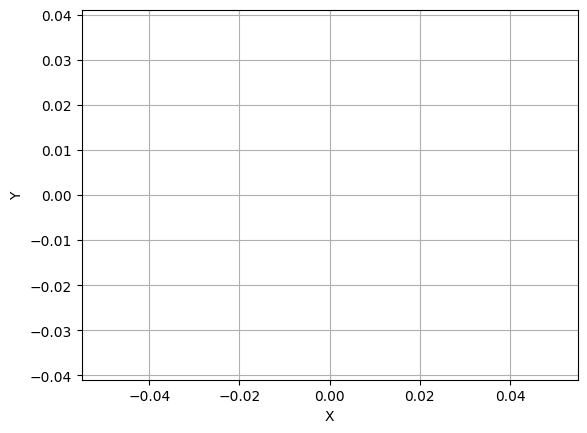

In [21]:
def main():                                                             #Main function
    input_value = input("1. Two polygons intersection\n2. Circle and Square intersection\n3. Circle and Polygon intersection\n4. Square and Polygon intersection\n")
    
    if input_value.isdigit():
        input_value = int(input_value)
        if input_value == 1:
            polygon1 = get_polygon_input()
            polygon2 = get_polygon_input()
            plot_polygon(polygon1, 'b')
            plot_polygon(polygon2, 'g')
            if gjk_intersect_polygon(polygon1, polygon2):
                print("Polygons intersect")
                plt.title("Polygons intersect")
            else:
                print("Polygons do not intersect")
                plt.title("Polygons do not intersect")
        elif input_value == 2:
            square = get_square_input()
            circle_center, radius = get_circle_input()
            plot_square(square, 'b')
            plot_circle(circle_center, radius, 'g')
            if gjk_intersect_circle(circle_center, radius, square):
                print("Circle and Square intersect")
                plt.title("Circle and Square intersect")
            else:
                print("Circle and Square do not intersect")
                plt.title("Circle and Square do not intersect")
        elif input_value == 3:
            polygon = get_polygon_input()
            circle_center, radius = get_circle_input()
            plot_polygon(polygon, 'b')
            plot_circle(circle_center, radius, 'g')
            if gjk_intersect_circle(circle_center, radius, polygon):
                print("Circle and Polygon intersect")
                plt.title("Circle and Polygon intersect")
            else:
                print("Circle and Polygon do not intersect")
                plt.title("Circle and Polygon do not intersect")
        elif input_value == 4:
            square = get_square_input()
            polygon = get_polygon_input()
            plot_square(square, 'b')
            plot_polygon(polygon, 'g')
            if gjk_intersect_polygon(square, polygon):
                print("Square and Polygon intersect")
                plt.title("Square and Polygon intersect")
            else:
                print("Square and Polygon do not intersect")
                plt.title("Square and Polygon do not intersect")
        else:
            print("Invalid input")
    else:
        print("Invalid input")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

if __name__ == '__main__':
    main()


---------------------------------------------------END-------------------------------------------------------------